# Miguel John Landrito
## DATASCI Asynchronous Exercise - Health site near you
---




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [2]:
!pip install git+git://github.com/geopandas/geopandas.git
!pip install pygeos
!apt install libspatialindex-dev
!pip3 install rtree

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-ifb1p6g3
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-ifb1p6g3
     |████████████████████████████████| 15.3MB 315kB/s 
     |████████████████████████████████| 6.5MB 36.2MB/s 
  Created wheel for geopandas: filename=geopandas-0.9.0+22.g85e066a-py2.py3-none-any.whl size=995260 sha256=ffa9a0b0f5da24e5989bbb467f54e98fde5b5a03d07958ba44db41f9fb4f3bdb
  Stored in directory: /tmp/pip-ephem-wheel-cache-ggydjd7t/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
     |████████████████████████████████| 2.1MB 3.9MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4

In [3]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [4]:
gpd.read_file?

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
root_path = "gdrive/My Drive/Colab Notebooks/Async Homework/"

In [7]:
image_dir = "gdrive/My Drive/Colab Notebooks/Async Homework/finalvisualizations/"

In [8]:
# Read shapefile
ph = gpd.read_file(root_path + 'datasets/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [9]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

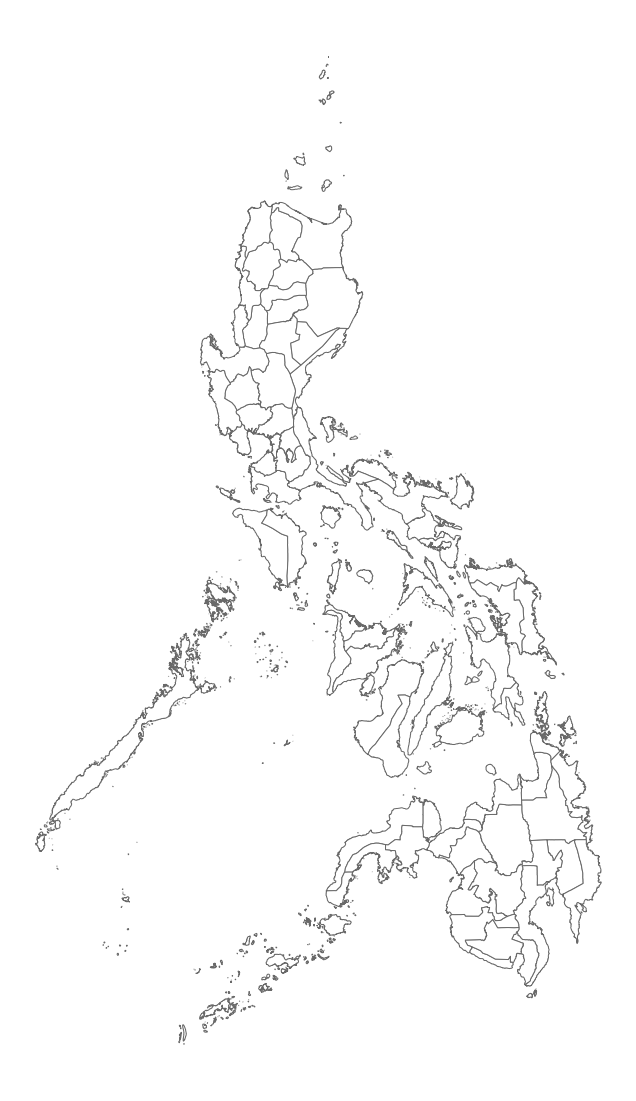

In [10]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [11]:
# Read GeoJSON file
healthsites = gpd.read_file(root_path + 'datasets/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


## Basic Visualization

With `matplotlib` and `descartes` built into `geopandas`, we can easily plot a `GeoDataFrame` by simply calling the `plot` function. Most of the parameters that come with the `plot` function from `pandas` can also be used here.

(116.444486621, 127.08919715899998, 3.7627797585, 21.894300891499995)

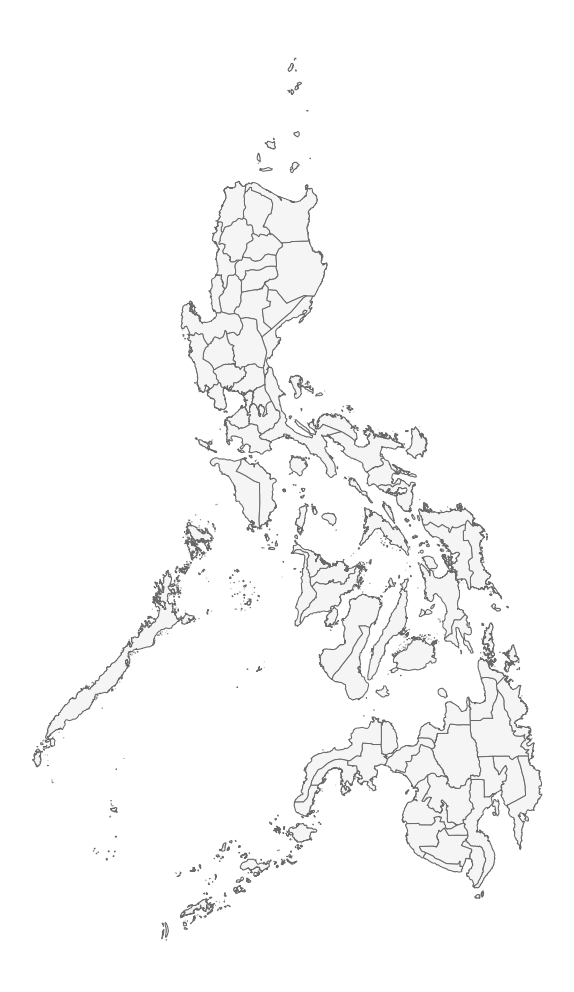

In [12]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

## Merging Data

There are two ways we can merge data in GeoPandas:
1. Attribute join
2. Spatial join

### Spatial Join
Spatial join is already built into `geopandas` through the function `gpd.sjoin()`. The spatial operation is passed through the parameter `op` and the join can also be specified like a merge in `pandas` through the parameter `how`.

The main thing to remember when doing a spatial join is the **order** of the `GeoDataFrame` parameters you pass matters. When you do an `sjoin`, only the geometry of the left `GeoDataFrame` is left in the merged data. So make sure you carefully consider what data you want left behind and it also depends on what question you are trying to answer.

In [13]:
gpd.sjoin?

# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

Note: Some of the provinces do not have all of the amenities available in their locations. These will not have visualizations in the succeeding cells.

In [14]:
healthcare = healthsites[healthsites.amenity=='healthcare']
social_facility = healthsites[healthsites.amenity=='social_facility']
clinic = healthsites[healthsites.amenity=='clinic']
hospital = healthsites[healthsites.amenity=='hospital']
laboratory = healthsites[healthsites.amenity=='laboratory']
pharmacy = healthsites[healthsites.amenity=='pharmacy']
doctor = healthsites[healthsites.amenity=='doctors']
dentist = healthsites[healthsites.amenity=='dentist']

#### Metro Manila's Health Amenities

In [15]:
metromanila = ph[ph.NAME_1=="Metropolitan Manila"]

##### Clinics

In [16]:
metromanila_clinics = gpd.sjoin(clinic, metromanila, op='within')
metromanila_clinics.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
37,5920487685,node,18.0,,clinic,,Quirino Highway,,,83885861.0,,,,c14e8661af6449b295ffd83f98e92057,,Mo-Sa 09:00-18:00,,,,,3.0,,2020-04-21T14:08:42,2,,,M.K.Bumagat Dental Clinic,,RAytoun,,,,,,,None,None,POINT (121.07758 14.74410),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
61,121507897,way,21.0,,clinic,,Don Chino Roces Avenue,,,76242066.0,,,,97bb4d4120e74990ad1d1e2748265a56,,,,,,,3.0,,2019-10-26T12:17:04,,1231,Makati,Fresenius Medical Care,,Rally,,,,,dialysis,,None,None,"POLYGON ((121.01895 14.54044, 121.01916 14.540...",46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
104,7328659788,node,21.0,,clinic,,Carlos P Garcia Avenue,,,82632960.0,,,+632 8426 9779,3b6287359df74424bbfb70d8f5b53e40,,,,,,,2.0,,2020-03-26T00:46:52,,,,UP Diliman Health Center,,GOwin,,,,,clinic,public,None,None,POINT (121.06527 14.64769),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
109,7154387721,node,9.0,,clinic,,,,,79987239.0,,,,b25634535320428f8a138994338bc217,,,,,,,1.0,,2020-01-23T16:17:58,,,,Health Port,,Rally,,,,,,,None,None,POINT (121.00315 14.55888),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
132,4927834221,node,15.0,,clinic,,Bonifacio,,,80625591.0,,,,73e2dfa314604c87a6b356244db502a6,,,,,,,3.0,,2020-02-06T07:29:41,,,,Bagong Katipunan Health Center,,GOwin,,,,,paramedic,,None,None,POINT (121.07520 14.55869),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


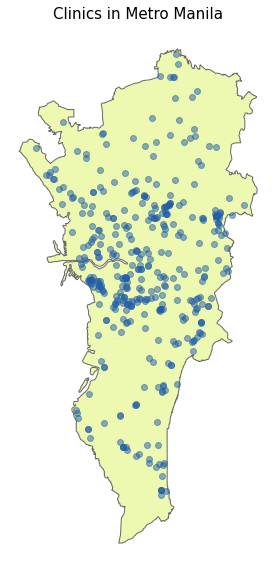

In [17]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_clinics.plot(ax=ax, alpha=0.5, color="#225ea8")
ax.set_title('Clinics in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}mm-clinic.png")

##### Dentists

In [18]:
metromanila_dentists = gpd.sjoin(dentist, metromanila, op='within')
metromanila_dentists.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
15,796284976,way,9.0,,dentist,,,,,84795442.0,,,,893a1a5f33244c50a96e9a8bd5d255e5,,,,,,,2.0,,2020-05-07T02:47:29,,,,,,GraniteBender,,,,,dentist,,None,None,"POLYGON ((121.05898 14.73862, 121.05904 14.738...",46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
208,6364087400,node,12.0,,dentist,,,,,68574404.0,,,,fb2d2d5fa50948e3a1d446a4fa543023,,,,,,,1.0,,2019-03-27T06:34:38,,,,Dental Clinic,,johnmc08,,,,,dentist,,None,None,POINT (121.05141 14.50035),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
228,4439824891,node,9.0,,dentist,,Cabildo,,,83868195.0,,,,bd3c4ef62f454d3886421d739826f074,,,,,,,2.0,,2020-04-21T09:07:11,,,,,,GOwin,,,,,,,None,None,POINT (120.97425 14.59151),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
249,6975522485,node,15.0,,dentist,,Ascencion Avenue,,,77046736.0,,,,9e410d5c67f249bea035378cf17383a5,,,,,,,1.0,,2019-11-14T03:15:50,B42 L63,,,Editha Sia Jose,,yahoo-cel_ph,,,,,,,None,None,POINT (121.06670 14.72605),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
279,3076961797,node,12.0,,dentist,,,,,25435196.0,,,,1d8dbfd5bfac426183fb648b3b4df92e,,,,,,,1.0,,2014-09-14T15:44:16,,,Manila,Dr. Lui Dental Clinic,,Rally,,,,,,,None,None,POINT (121.01269 14.58151),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


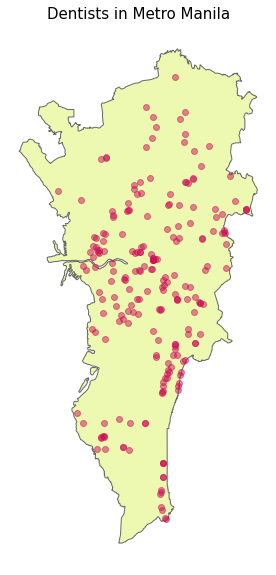

In [19]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_dentists.plot(ax=ax, alpha=0.5, color="#ce1256")
ax.set_title('Dentists in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}mm-dentists.png")

##### Doctors

In [20]:
metromanila_doctors = gpd.sjoin(doctor, metromanila, op='within')
metromanila_doctors.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
12,4361891690,node,15.0,,doctors,,Scout Dr. Lazcano,,,41620619.0,,,,6c702af37c4a49d89dac127cc8a229f6,,,,,,,1.0,,2016-08-22T18:10:30,73-G,,,NYTheraspine,,FortuneSolace,,,,,,,None,None,POINT (121.03133 14.63151),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
69,7785286855,node,15.0,,doctors,,,Dr. Joel Nicdao,,88948893.0,,,,e8cbb811bbf04c399e8db923270ab9a1,,,,,,,2.0,,2020-08-04T21:25:54,,,,McGill Mediplus,,mapbeks,,,,,doctor,,None,None,POINT (121.04419 14.55357),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
624,974331400,node,15.0,,doctors,,Bayan-Bayanan Avenue,,,23514481.0,,,,fe91d1df95e34478871ca050124789ad,,,,,,,4.0,,2014-07-02T04:54:57,,,Marikina,Santa Faustina Health Care,,maning,,,,,,,None,None,POINT (121.10795 14.65063),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
665,4119521890,node,18.0,,doctors,,8th Avenue,,,80793175.0,,,,27c460861d6f41c8b41e1ec22f35ea83,,24/7,,,,,2.0,,2020-02-10T11:38:52,,,,St. Laura Medical and Ob-gyn Clinic,,GOwin,,,,,doctor,,None,None,POINT (121.05775 14.51527),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
1449,4574916393,node,9.0,,doctors,,,,,86332297.0,,,,37fdc35b625c43d1a6ca10176692e34a,,,,,,,2.0,,2020-06-08T06:05:04,,,,Exactcheck,,mipangan,,,,,,,None,None,POINT (121.00055 14.64336),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


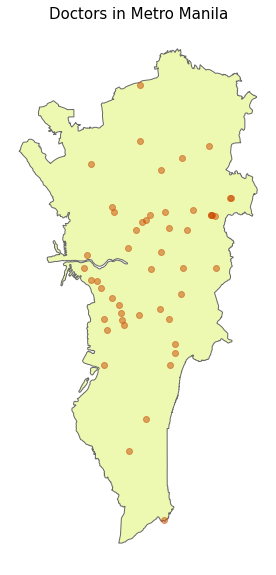

In [21]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_doctors.plot(ax=ax, alpha=0.5, color='#cc4c02')
ax.set_title('Doctors in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}mm-doctors.png")

##### Healthcare

In [22]:
metromanila_healthcare = gpd.sjoin(healthcare, metromanila, op='within')
metromanila_healthcare.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
8813,5950372084,node,15.0,,healthcare,,General T. de Leon,,,84991753.0,,,,2ed104a068eb4080a22d3e1626ae646d,,,,,,,2.0,,2020-05-11T01:04:16,,,,Peso Plus Drug,,GOwin,,,,,pharmacy,,None,None,POINT (120.97741 14.68952),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


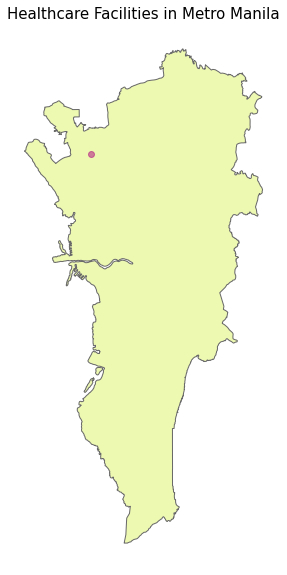

In [23]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_healthcare.plot(ax=ax, alpha=0.5, color='#ae017e')
ax.set_title('Healthcare Facilities in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}mm-healthcare.png")

##### Hospitals

In [24]:
metromanila_hospital = gpd.sjoin(hospital, metromanila, op='within')
metromanila_hospital.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
63,7278748585,node,25.0,,hospital,,Quirino Highway,,,85720762.0,,,,b9e0c7a0573947f59cf999c83c4257e9,,,,,,,3.0,,2020-05-25T14:11:24,411,1116,Quezon City,Vian Family Hospital II,,ianlopez1115,,,,,,private,None,None,POINT (121.02106 14.68285),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
76,255070464,node,25.0,,hospital,,,,,89338589.0,,,,86da2596aba44314b7afe48b7a906fad,,,,jklinc;streetlevel imagery,,,6.0,yes,2020-08-13T07:01:48,,1100,Quezon City,Dr. Montano G. Ramos General Hospital,,b-jazz-bot,,,,,hospital,,None,None,POINT (121.02356 14.65952),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
128,1446052374,node,15.0,,hospital,,Pio Valenzuela,,,82663468.0,,,,d159c60b6b8f4895a73830feb58a0dc1,,,,,,,3.0,,2020-03-26T12:52:17,,,,Perlas Polyclinic,,GrabPHMikko,,,,,laboratory,,None,None,POINT (120.98359 14.67528),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
158,121189960,way,25.0,,hospital,,General Ordonez,,,82632960.0,,,,9e64eb39467043e688d7973da3f804e7,,,,,,,6.0,,2020-03-26T00:46:52,108,,Marikina,San Ramon Hospital,,GOwin,,,,,hospital,private,None,None,"POLYGON ((121.11712 14.64420, 121.11722 14.644...",46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
201,303409437,way,15.0,,hospital,,New Panaderos,,,25445424.0,,,,ca7fb1964ef94861924cbd47493728fa,,,,,,,1.0,,2014-09-15T01:39:08,,,Manila,Trinity Woman and Child Hospital,,Rally,,,,,,,None,None,"POLYGON ((121.01736 14.58434, 121.01753 14.584...",46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


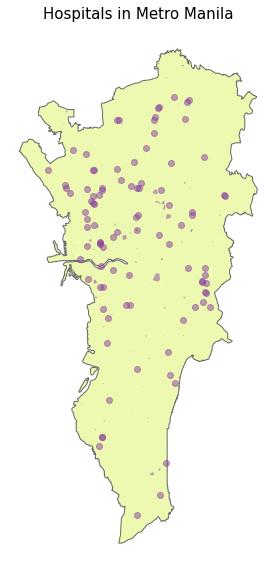

In [25]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_hospital.plot(ax=ax, alpha=0.5, color='#88419d')
ax.set_title('Hospitals in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}mm-hospitals.png")

##### Pharmacies

In [26]:
metromanila_pharmacy = gpd.sjoin(pharmacy, metromanila, op='within')
metromanila_pharmacy.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
18,1337361512,node,12.0,,pharmacy,,,,,18298881.0,,,,93e2f36b9f3b4447a6a5a3dfcdc9bc98,,,,,,,2.0,,2013-10-11T14:32:42,,,Pasig,Mercury Drug Store,,Rally,,,,,,,None,None,POINT (121.08552 14.59049),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
21,7418383285,node,9.0,,pharmacy,,,,,83760358.0,,,,95dbaf6e0cfb4583a51716cbfb0c85ff,,,,,,,1.0,,2020-04-19T04:14:42,,,,The Generics Pharmacy,,Marah Pajutan,,,,,,,None,None,POINT (121.06715 14.70000),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
26,4217096997,node,18.0,,pharmacy,,Shaw Boulevard,,,97336875.0,,,,8397222677074517a706975941038284,,Mo-Su 07:00-22:00,,,,,6.0,,2021-01-12T02:45:21,,,,Mercury Drug,,GOwin,,,,,pharmacy,,None,None,POINT (121.05937 14.57659),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
27,6556682427,node,12.0,,pharmacy,,J.P. Rizal,,,71387128.0,,,,ff016206783f4a66b091ee64773a31b2,,,,,,,1.0,,2019-06-19T04:59:18,,,,Marcelo's Pharmacy,,GOwin,,,,,,,None,None,POINT (121.01444 14.57230),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


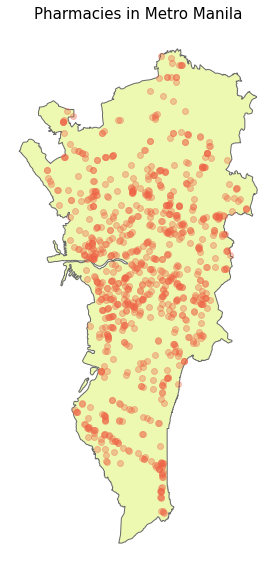

In [27]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_pharmacy.plot(ax=ax, alpha=0.35, color='#ef6548')
ax.set_title('Pharmacies in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}mm-pharmacies.png")

### Cavite's Health Amenities

In [28]:
cavite = ph[ph.NAME_1=="Cavite"]

##### Clinics

In [29]:
cavite_clinic = gpd.sjoin(clinic, cavite, op='within')
cavite_clinic.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
43,654204056,node,12.0,,clinic,,,,,18372734.0,,,,be8d452cbf7049a58fe4ffb7d51563d6,,,,,,,6.0,,2013-10-15T17:38:24,,,General Trias,Escuadro Clinic,,pnorman_mechanical,,,,,,,None,None,POINT (120.87874 14.38307),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
95,3785714613,node,12.0,,clinic,,,,,94072691.0,,,,74aa40aa0071470597c9dcb76aa51e8d,,,,,,,2.0,,2020-11-13T16:05:41,,,,AL Santos Medical Clinic,,dasmarinas_mapper,,,,,clinic,,None,None,POINT (120.95754 14.32977),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
256,7305037630,node,21.0,,clinic,,,,,82330423.0,,,+6346 4344057;+639267013539;+63925 8787158,b0676d033e964d66bb1dea1bc55872a7,,,,,,,1.0,,2020-03-18T05:41:51,,,Imus,Imus Social Hygiene Clinic,,mapbeks,,,,,clinic,government,None,None,POINT (120.92774 14.43800),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
295,6433339585,node,9.0,,clinic,,,,,69652500.0,,,,04c0096f653e4015bba3798f32127dd8,,,,,,,1.0,,2019-04-28T00:25:37,,,,Fhei,,Khris Santos,,,,,,,None,None,POINT (120.87712 14.26007),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
322,249871861,way,15.0,,clinic,,,,,55001425.0,,,,5104c1cbb27c4954b852ec2a1bc5377e,,,,,,,4.0,,2017-12-29T06:40:27,,4103,Imus,,,FSG 1,,,,,clinic,,None,None,"POLYGON ((120.92677 14.43858, 120.92685 14.438...",23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV


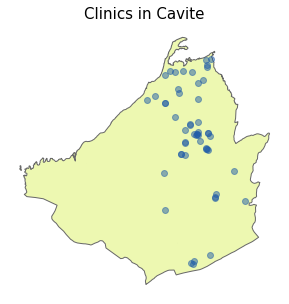

In [30]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
cavite.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
cavite_clinic.plot(ax=ax, alpha=0.5, color="#225ea8")
ax.set_title('Clinics in Cavite', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}cav-clinic.png")

##### Dentists

In [31]:
cavite_dentist = gpd.sjoin(dentist, cavite, op='within')
cavite_dentist.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
54,409903248,way,12.0,,dentist,,,,,41077167.0,,,,f6abc35781884e57939d146ee4bb4068,,,,,,,4.0,,2016-07-28T04:58:03,,4119,Amadeo,,,schadow1,,,,,,,None,None,"POLYGON ((120.92430 14.17193, 120.92443 14.171...",23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
584,1745590794,node,18.0,,dentist,,Antero Soriano Highway,,,18372734.0,,,,af108d03f84e4476bf65dacf15152c0f,,,,,,,5.0,,2013-10-15T17:35:15,,4103,Imus,Ideal Smile Dental Clinic,,pnorman_mechanical,,,,,,,None,None,POINT (120.91114 14.44105),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
634,4638214701,node,21.0,,dentist,,Captain C Nazareno,,,45569840.0,,,,a3660c7ed4774482b07770a7dff9f1cb,,,,,,,1.0,,2017-01-27T18:27:02,105,4110,Naic,Dr. Gina Acosta Dental Clinic,,paleboyy,,,,,,,None,None,POINT (120.76807 14.31557),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
848,662727176,node,18.0,,dentist,,A. Bonifacio,,,18372734.0,,,,367a7802488148168c024d339aebb850,,,,,,,5.0,,2013-10-15T17:37:42,,4107,General Trias,Fortuno Dental Clinic,,pnorman_mechanical,,,,,,,None,None,POINT (120.87931 14.38167),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
1011,7936290445,node,18.0,,dentist,,Santa Rosa - Tagaytay Road,,,91401001.0,,,,75ceea3ab4b74bfc9072d5e8d935f983,,,,,,,1.0,,2020-09-24T04:28:07,,4118,Silang,Smile Ready Dental Clinic,,TagaSanPedroAko,,,,,,,None,None,POINT (121.02762 14.21146),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV


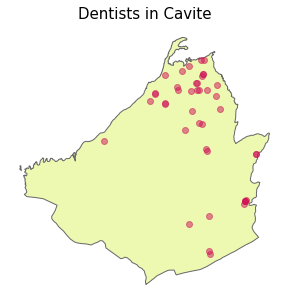

In [32]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
cavite.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
cavite_dentist.plot(ax=ax, alpha=0.5, color="#ce1256")
ax.set_title('Dentists in Cavite', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}cav-dentists.png")

##### Doctors


In [33]:
cavite_doctor= gpd.sjoin(doctor, cavite, op='within')
cavite_doctor.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
343,937408383,node,9.0,,doctors,,,,,39776122.0,,,,537618ac0cc743399c4544ea71db0466,,,,,,,4.0,,2016-06-03T10:56:47,,,,Holy Spirit,,TriziaM,,,,,,,None,None,POINT (120.76799 14.31573),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
947,924740326,node,12.0,,doctors,,,,,56969124.0,,,,fd014b4055f448e9940daaaa923dba8c,,,,,,,6.0,,2018-03-07T13:40:22,,,,General Mariano Alvarez Rural Health Unit,,GOwin,,,,,doctor,,None,None,POINT (121.01281 14.30491),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
1692,924256812,node,15.0,,doctors,,,,,56969124.0,,,,6535b99b15be459d9e0acbbf94e2b8a2,,,,,,,5.0,,2018-03-07T13:40:22,,,Magallanes,Rural Health Unit,,GOwin,,,,,doctor,,None,None,POINT (120.74067 14.17776),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
1717,8166189010,node,12.0,,doctors,,General Luna,,,94804869.0,,,,489ccea631914f84bb8b76e69de18459,,,,,,,1.0,,2020-11-26T01:33:42,,,,Mendez Rural Health Unit,,GOwin,,,,,,,None,None,POINT (120.90544 14.12971),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
1984,931621513,node,9.0,,doctors,,,,,38551803.0,,,,e06c8dcd26c5488fb93bcfcfba47accd,,,,,,,4.0,,2016-04-14T10:04:52,,,,Lungampong Balagbag Health Center,,kpmontalbo,,,,,,,None,None,POINT (120.84983 14.17425),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV


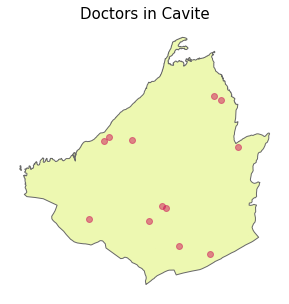

In [34]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
cavite.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
cavite_doctor.plot(ax=ax, alpha=0.5, color="#ce1256")
ax.set_title('Doctors in Cavite', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}cav-doctors.png")

##### Hospitals

In [35]:
cavite_hospital = gpd.sjoin(hospital, cavite, op='within')
cavite_hospital.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
127,190079521,way,18.0,,hospital,,Antero Soriano Highway,,,40753161.0,,,,898e3c255af840fb8c62e0abc438677d,,,,,,,4.0,,2016-07-15T04:07:03,,4108,Tanza,Tanza General Hospital,,schadow1,,,,,,,None,None,"POLYGON ((120.84856 14.39053, 120.84891 14.390...",23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
146,417552543,way,18.0,,hospital,,,,,54065327.0,,,,10741efabba648499eea03b2a241a935,,,,,,,3.0,,2017-11-25T05:58:55,,4109,Trece Martires,ERS Clinic,,CharmaineAlmonidovar,,,,,hospital,,None,None,"POLYGON ((120.86968 14.27762, 120.86979 14.277...",23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
296,-8204541,way,21.0,,hospital,,Pala-Pala Road,,,NaN,,,,d48ac86db7a545b79a6c15a9b6ec974a,,,,,,,NaN,yes,None,,4114,Dasmariñas,Asia Medic Family Hospital and Medical Center,,None,yes,,,,,,None,None,"POLYGON ((120.95642 14.29931, 120.95648 14.299...",23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
375,921127165,node,9.0,,hospital,,,,,18372734.0,,,,8fc2fadc2c384560bc3e963673276b59,,,,,,,3.0,,2013-10-15T17:28:37,,,,Naic Doctors Hospital,,pnorman_mechanical,,,,,,,None,None,POINT (120.77097 14.31457),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
430,113663387,way,9.0,,hospital,,,,,21604318.0,,,,b07b2e1761934adc8d11d98758d6604c,,,,,,,4.0,,2014-04-10T10:20:41,,,,General Trias Medicare Hospital,,maning,,,,,,,None,None,"POLYGON ((120.88185 14.37390, 120.88194 14.373...",23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV


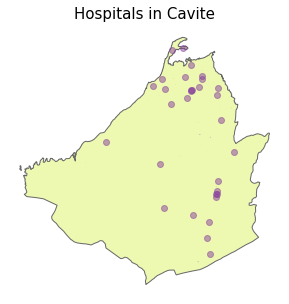

In [36]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
cavite.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
cavite_hospital.plot(ax=ax, alpha=0.5, color="#88419d")
ax.set_title('Hospitals in Cavite', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}cav-hospitals.png")

##### Pharmacies

In [37]:
cavite_pharmacy = gpd.sjoin(pharmacy, cavite, op='within')
cavite_pharmacy.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
35,550540215,way,21.0,,pharmacy,,Buhay Na Tubig,,,63294186.0,,,,5c2baf2cdd664645b678cd7e488209a8,,,,,,,2.0,,2018-10-08T03:07:49,,4103,Imus,TGP,,GOwin,,,,,pharmacy,,None,None,"POLYGON ((120.95677 14.40666, 120.95683 14.406...",23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
87,2476861481,node,21.0,,pharmacy,,A. Bonifacio,,,18372734.0,,,,4d18f2535a8148e99ca59bba6cbf701a,,,,,,,3.0,,2013-10-15T17:36:37,,4107,General Trias,Generika,,pnorman_mechanical,,,,no,,,None,None,POINT (120.87932 14.38153),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
103,4103821889,node,12.0,,pharmacy,,Governor Ferrer,,,38365718.0,,,,6c546b61207a487f91ec9ea4737379c6,,,,,,,1.0,,2016-04-06T22:57:55,,,,Mercury Drug,,Mandiesel,,,,,,,None,None,POINT (120.87926 14.38095),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
134,3785711317,node,9.0,,pharmacy,,,,,34625636.0,,,,5ea8abf8dfc3443d82d0c228b4e43949,,,,,,,1.0,,2015-10-14T05:13:19,,,,Mavb Pharmacy,,Migz M,,,,,,,None,None,POINT (120.95752 14.33035),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV
160,1186819144,node,9.0,,pharmacy,,,,,18372734.0,,,,503e5d96f43c4465807ecf8e623f0128,,,,,,,3.0,,2013-10-15T17:16:24,,,,17/7 Pharmacy,,pnorman_mechanical,,,,,,,None,None,POINT (120.96942 14.39636),23,PHL,Philippines,PHL.24_1,Cavite,None,None,Lalawigan|Probinsya,Province,421,PH.CV


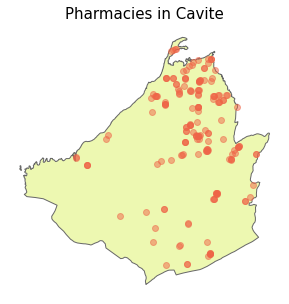

In [38]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
cavite.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
cavite_pharmacy.plot(ax=ax, alpha=0.5, color="#ef6548")
ax.set_title('Pharmacies in Cavite', fontsize=15)
ax.axis('off');
plt.savefig(f"{image_dir}cav-pharmacies.png")